<a href="https://colab.research.google.com/github/aasingh27/LSTM_EquityModel/blob/main/LSTMModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

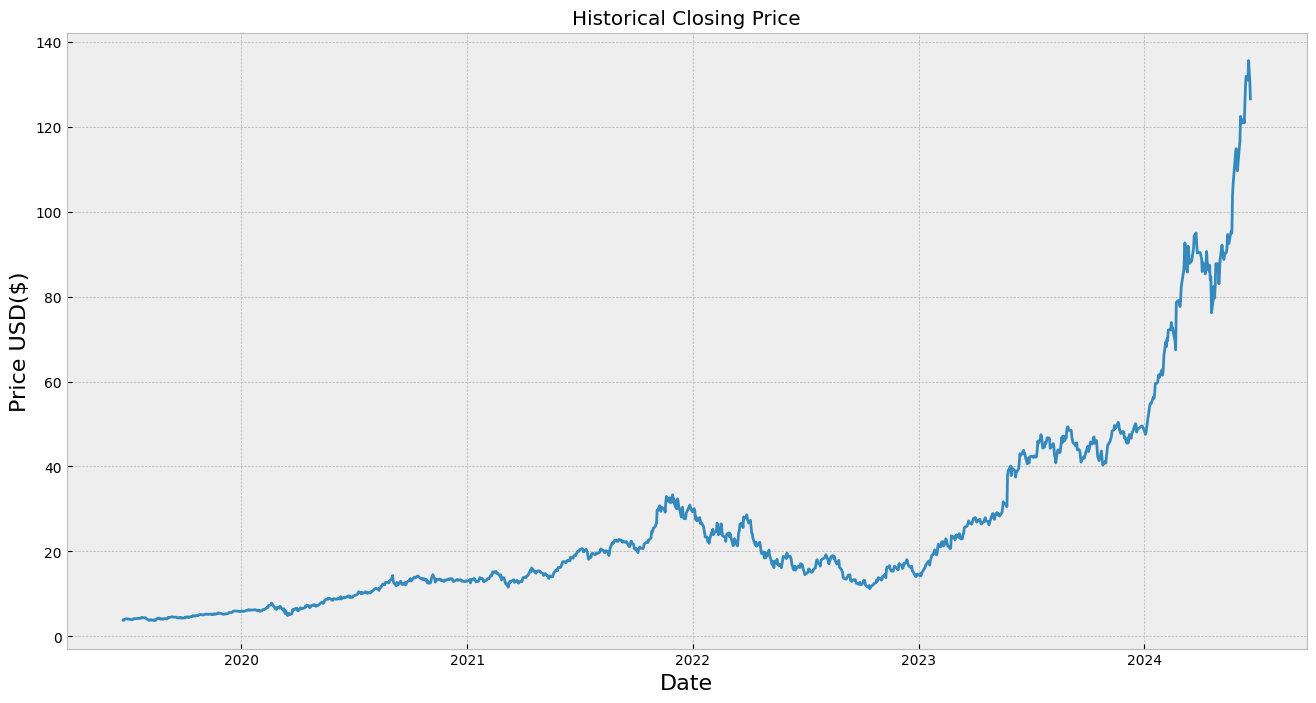

In [8]:
#Import libararies

import math
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use("bmh")


nvda = yf.Ticker("NVDA")
df = nvda.history(period = "5y")

plt.figure(figsize=(16,8))
plt.title("Historical Closing Price")
plt.plot(df["Close"])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price USD($)', fontsize=16)
plt.show


In [12]:
data = df.filter(['Close'])

dataset = data.values

training_set_length = math.ceil(len(dataset) * 0.8)

#Scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Training data set

train_data = scaled_data[0:training_set_length, :]
x_train = []
y_train = []


for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

#Convert x train a y train to numpy arrays for training

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


(947, 60, 1)

In [14]:
# Model Arch.
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

947/947 [==============================] - 27s 24ms/step - loss: 2.6778e-04


In [ ]:
#Create array with scaled values

test_data = scaled_data[training_set_length - 60: , :]
x_test = []
y_test = dataset[training_set_length: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])


In [19]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#Predict stock price

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)


8/8 [==============================] - 1s 13ms/step


In [22]:
#Get RMSE(Root Mean Squared Error) to check accruacy

rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

#2.0705157580128706 return value

2.0705157580128706

<ipython-input-23-12f0a7fa5a4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = pred


<function matplotlib.pyplot.show(close=None, block=None)>

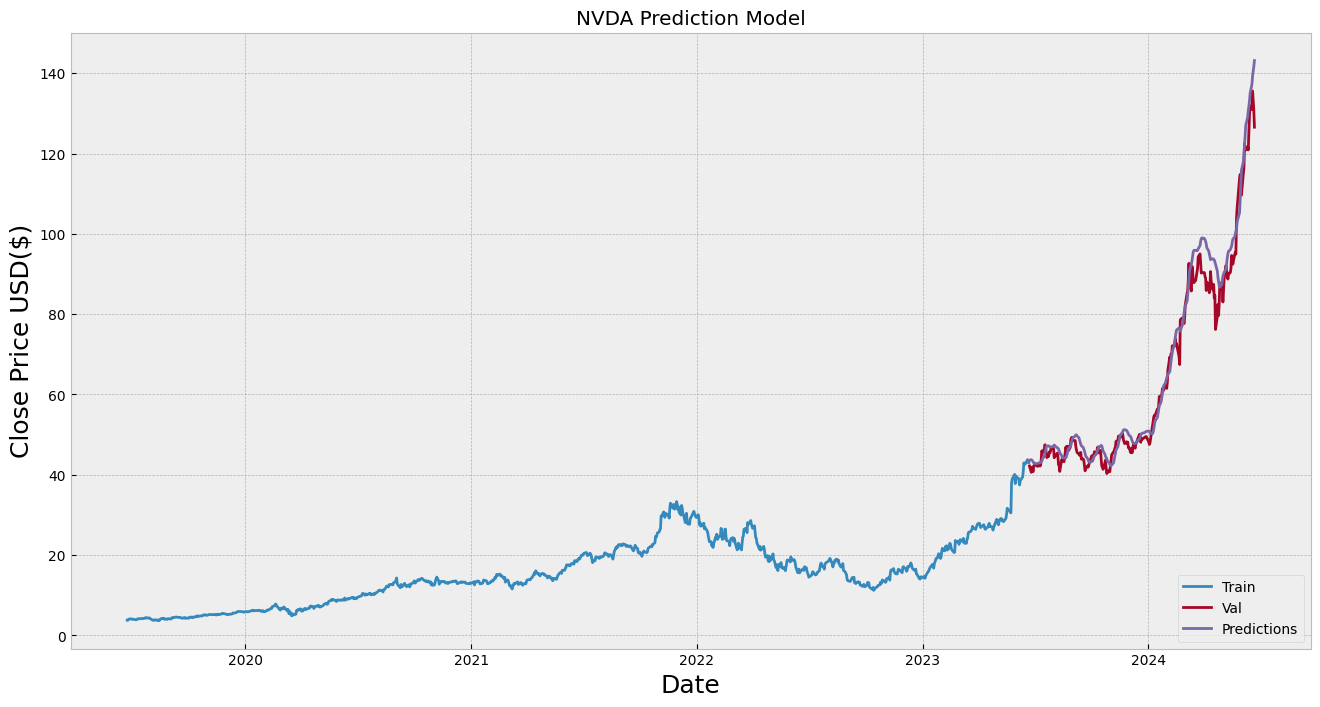

In [23]:
train = data[0:training_set_length]
validation = data[training_set_length:]
validation['Predictions'] = pred

plt.figure(figsize=(16,8))
plt.title('NVDA Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show


In [25]:
validation

,Close,Predictions
Date,,
2023-06-23 00:00:00-04:00,42.196365,43.590126
2023-06-26 00:00:00-04:00,40.619839,43.773941
2023-06-27 00:00:00-04:00,41.863468,43.625515
2023-06-28 00:00:00-04:00,41.104694,43.467697
2023-06-29 00:00:00-04:00,40.809776,43.221687
...,...,...
2024-06-14 00:00:00-04:00,131.880005,134.986801
2024-06-17 00:00:00-04:00,130.979996,137.252197
2024-06-18 00:00:00-04:00,135.580002,139.283936
